In [123]:
import random
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import umap
from sklearn.decomposition import FastICA
from sklearn.random_projection import SparseRandomProjection
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [124]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import (PCA, IncrementalPCA,
                                   KernelPCA, TruncatedSVD,
                                   FastICA, MiniBatchDictionaryLearning,
                                   SparsePCA)

from sklearn.manifold import (Isomap,
                              LocallyLinearEmbedding)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.random_projection import (GaussianRandomProjection,
                                       SparseRandomProjection)

from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
                               
from sklearn.pipeline import make_pipeline

In [125]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [126]:
digits['images'][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

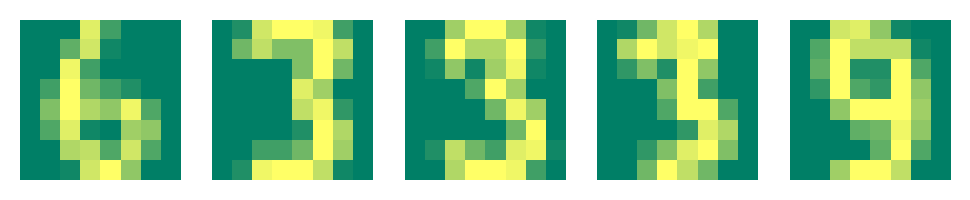

In [127]:
fig, ax_array = plt.subplots(1, 5)
fig.set_dpi(200)
axes = ax_array.flatten()
rand = random.sample(range(len(digits['images'])),5)
for i,ax in enumerate(axes):
    ax.imshow(digits.images[rand[i]], cmap='summer')
plt.setp(axes, xticks=[], yticks=[], frame_on=False);

In [128]:
print(digits.data.shape)

(1797, 64)


In [129]:
def plot_reduced_data(embedding, color_col):
    plt.figure(dpi=150)
    plt.scatter(embedding[:, 0], embedding[:, 1], c=color_col, cmap='rainbow', s=5)
    plt.gca().set_aspect('equal', 'datalim')
    n = len(np.unique(color_col))
    plt.colorbar(boundaries=np.arange(n+1)-0.5).set_ticks(np.arange(n)) 

(1797, 2)


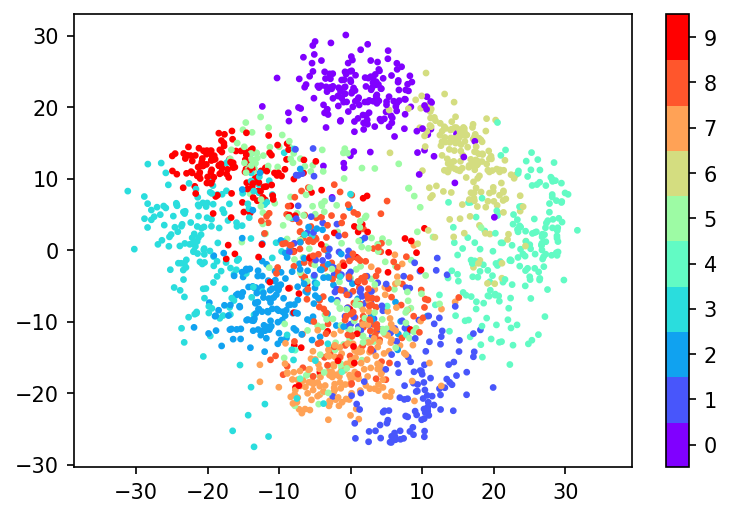

In [130]:
pca = PCA(2)  # PCA model reducing data to 2 dimensions (2 principal components)
pca_embedding = pca.fit_transform(digits.data)
print(pca_embedding.shape)
plot_reduced_data(pca_embedding, digits.target)

A) Use 2 other dimensionality reduction techniques (other than PCA nad UMAP) on the digits dataset (2 pts)

B) Use 2 other dimensionality reduction techniques (other than PCA nad UMAP) on the other dataset than digits (2 pts)

C) Use 1 other clustering technique on Iris dataset plot the results with UMAP as above (1 pt)

Please prepare the code in Jupyter notebook and send the notebook to lkrain@sgh.waw.pl with output of the execution.


A) Use 2 other dimensionality reduction techniques (other than PCA nad UMAP) on the digits dataset (2 pts)
   - Sparse Random Projection
   - ISOMAP
   - Independent Component analysis

In [131]:
random_state = 0

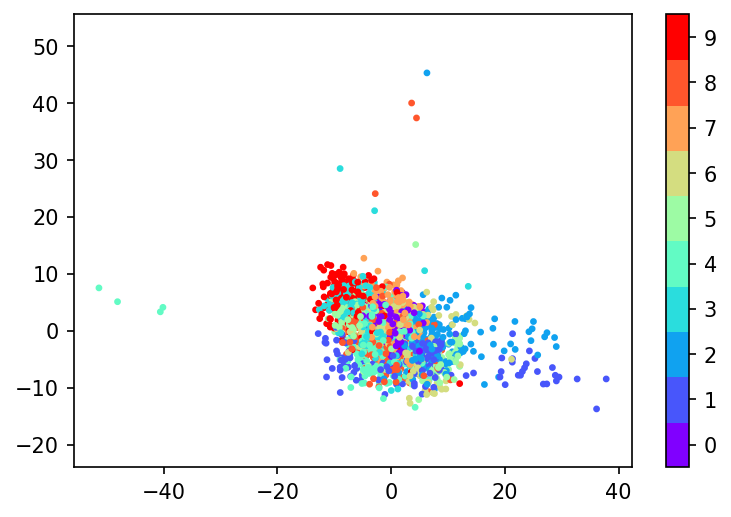

In [132]:
#Sparse Random Projection
SRP = make_pipeline(StandardScaler(),
                    SparseRandomProjection(n_components=2,
                                           density = 'auto',
                                           eps = 0.5,
                                           random_state=random_state,
                                           dense_output = False))
srp_digits_reduced = SRP.fit_transform(digits.data)
plot_reduced_data(srp_digits_reduced, digits.target)

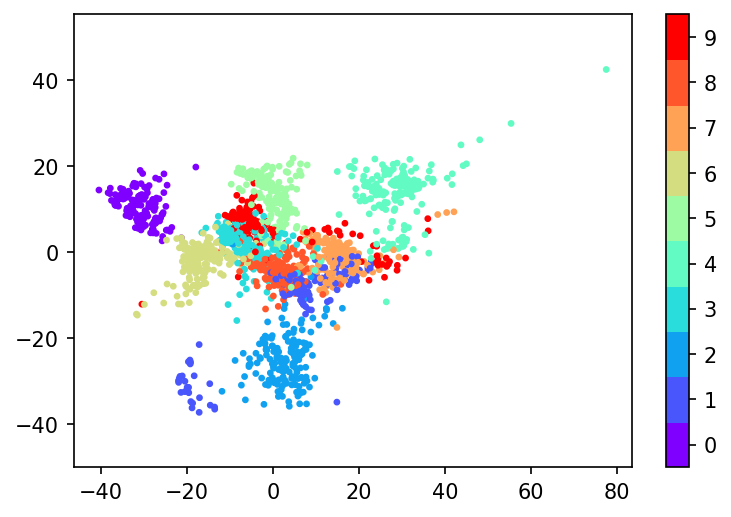

In [133]:
#ISOMAP
isomap = make_pipeline(StandardScaler(),
                       Isomap(n_components=2,
                              n_jobs = 4,
                              n_neighbors = 5))
isomap_digits_reduced = isomap.fit_transform(digits.data)
plot_reduced_data(isomap_digits_reduced, digits.target)

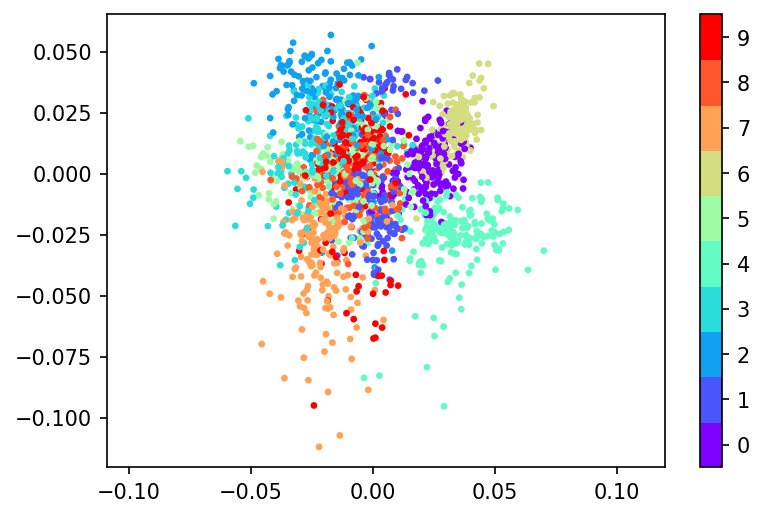

In [134]:
# Independent COmponent Analysis
FastICA = make_pipeline(StandardScaler(),
                        FastICA(n_components=2,
                                algorithm = 'parallel',
                                whiten = True,
                                max_iter = 100,
                                random_state=random_state))
ica_digits_reduced = FastICA.fit_transform(digits.data)
plot_reduced_data(ica_digits_reduced, digits.target)

B) Use 2 other dimensionality reduction techniques (other than PCA nad UMAP) on the other dataset than digits (2 pts)

We use the following dimensionality reduction techniques on `Breast_Cancer dataset`

- Sparce Random Projection
- ISOMAP

In [135]:
breast_cancer = load_breast_cancer()
scaled_features = StandardScaler().fit_transform(breast_cancer.data)

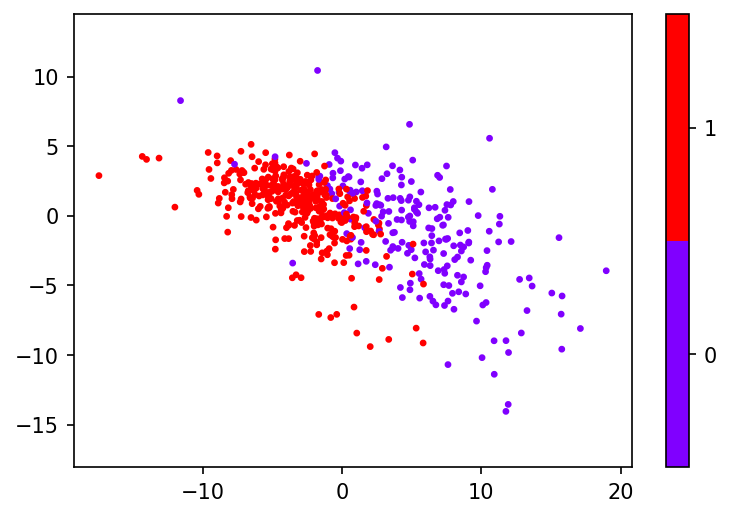

In [143]:
#Random Projection
randprojection_breast_cancer = SparseRandomProjection(n_components=3)
rand_proj_breast_cancer = randprojection_breast_cancer.fit_transform(scaled_features)
plot_reduced_data(rand_proj_breast_cancer, breast_cancer.target)

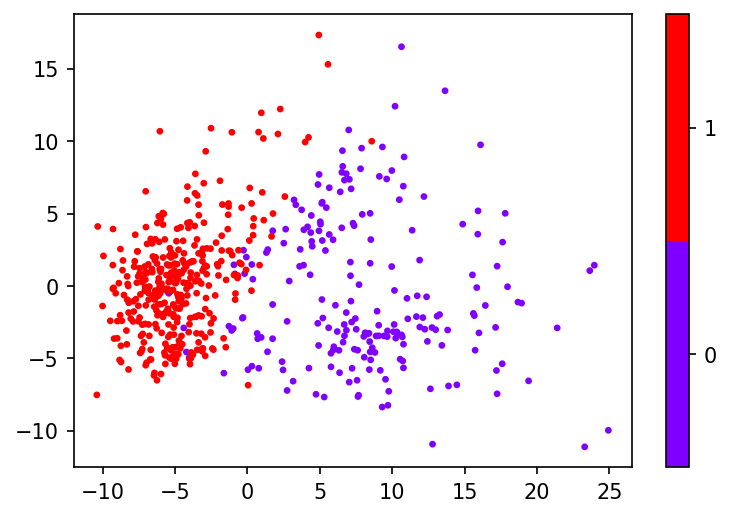

In [145]:
#ISOMAP
isomap = make_pipeline(StandardScaler(),
                       Isomap(n_components=2,
                              n_jobs = 4,
                              n_neighbors = 5))
isomap_breast_cancer_reduced = isomap.fit_transform(breast_cancer.data)
plot_reduced_data(isomap_breast_cancer_reduced, breast_cancer.target)

#### Clustering


In [146]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [147]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, names = ['sepal_length','sepal_width','petal_length','petal_width','species'])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [148]:
species = df.species
df = df.drop('species', axis = 1)

In [149]:
df = pd.DataFrame(StandardScaler().fit(df).transform(df))

In [150]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(df)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [151]:
model = umap.UMAP(random_state=42)
umap_embedding = model.fit(df).transform(df)

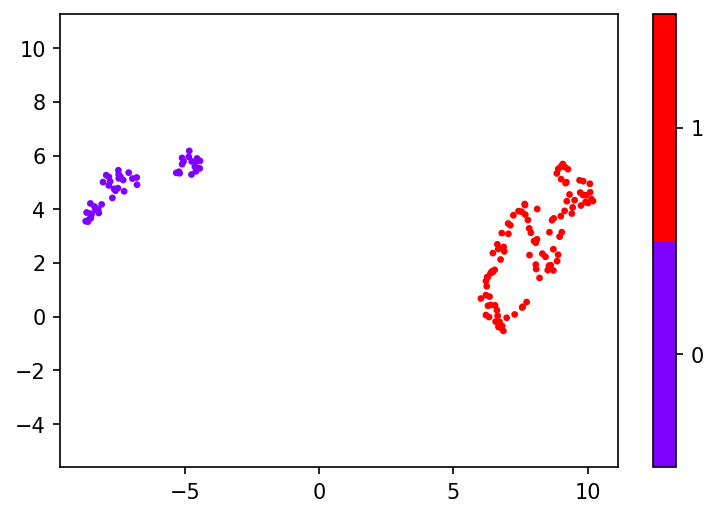

In [152]:
plot_reduced_data(umap_embedding, kmeans.labels_)

C) Use 1 other clustering technique on Iris dataset plot the results with UMAP as above (1 pt)

Using `Spectral Clustering`

In [153]:
random_state = None

In [154]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=2).fit(df)
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

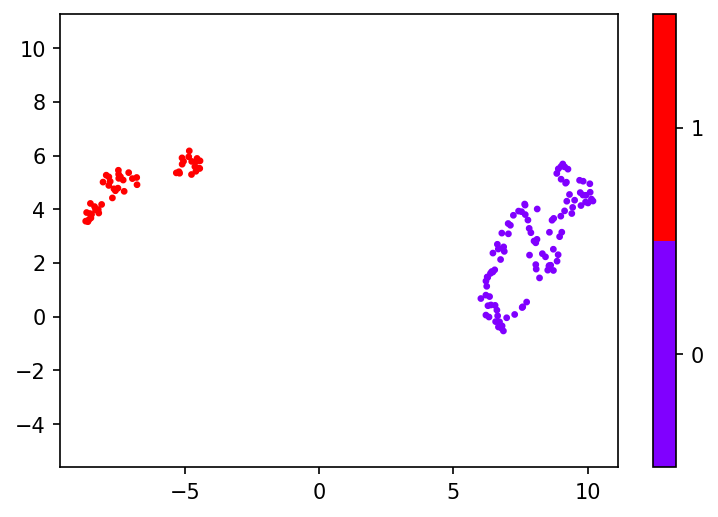

In [155]:
plot_reduced_data(umap_embedding, model.labels_)